<a href="https://colab.research.google.com/github/ericalcaraz/Proyecto-CFGS/blob/master/SparseCategoricalCrossentropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Neuronal Network

##Import all frameworks

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Upload breast cancer dataset

In [0]:
!git clone https://github.com/ericalcaraz/Proyecto-CFGS.git

In [0]:
df = pd.read_csv('Proyecto-CFGS/data.csv')

##Modify the dataset

In [0]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [0]:
mapdict = {'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].map(mapdict)
df = df.drop(columns=['Unnamed: 32'])

In [0]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [0]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
df.corr()['diagnosis'].sort_values(ascending=[False])

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
id                         0

##Extract the data by **Features** and **Labels** 

In [0]:
df = df.sample(frac=1)
labels = df['diagnosis']
my_features = ['concave points_worst',
               'perimeter_worst',
               'concave points_mean',
               'radius_worst',
               'perimeter_mean',
               'area_worst',
               'radius_mean',
               'area_mean',
               'concavity_mean',
               'concavity_worst',
               'compactness_mean',
               'compactness_worst'
               ]
features = df[my_features]
labels = labels.to_numpy()
features = features.to_numpy()


In [0]:
print(type(labels))
print(type(features))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
print('Labels')
print(labels.shape. end=' ')
print(labels.ndim)

print('\nFeatures:')
print(features.shape. end=' ')
print(features.ndim)

Labels
(569,)
1

Features:
(569, 12)
2


###Split the data between train, validation and test data

Should try split more the data with train, validation and test data to check if the model is overfited.

In [0]:
#Features & Targets Train
train_features = features[:455]
train_labels = labels[:455]

#Features & Targets Validation
validation_features = features[455:]
validation_labels = labels[455:]

# Test data
test_features = train_features[:57]
test_labels = train_labels[:57]

In [0]:
print('Train')
print('Features: ', train_features.shape, end=' Labels: ')
print(train_labels.shape)
print('Validation')
print('Features: ', validation_features.shape, end=' Labels: ')
print(validation_labels.shape)
print('Test')
print('Features: ', test_features.shape, end=' Labels: ')
print(test_labels.shape)

(455, 12)
(455,)
(114, 12)
(114,)
(57, 12)
(57,)


In [0]:
train_features = tf.convert_to_tensor(train_features, np.float64)
train_labels = tf.convert_to_tensor(train_labels, np.float64)

validation_features = tf.convert_to_tensor(validation_features, np.float64)
validation_labels = tf.convert_to_tensor(validation_labels, np.float64)

test_features = tf.convert_to_tensor(test_features, np.float64)
test_labels = tf.convert_to_tensor(test_labels, np.float64)

##Model

In [0]:
def my_model(epochs, batch_size, lr):
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(12, activation='relu', input_shape=[12]),

      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(32, activation='relu'),

      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64, activation='relu'),

      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(2, activation='softmax'),
  ])
  model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    metrics=['accuracy']
  )
  trained = model.fit(
    train_features,
    train_labels,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    verbose=2,
    steps_per_epoch=len(train_features)//batch_size,
    validation_steps=len(validation_features)//batch_size,
    validation_data=(validation_features, validation_labels)
  )
  return trained, model


###Fit the model

In [0]:
history, model = my_model(epochs=150, batch_size=16, lr=0.00085)

Epoch 1/150
28/28 - 0s - loss: 25.1367 - accuracy: 0.5871 - val_loss: 1.9537 - val_accuracy: 0.6161
Epoch 2/150
28/28 - 0s - loss: 19.2874 - accuracy: 0.5467 - val_loss: 7.9056 - val_accuracy: 0.7411
Epoch 3/150
28/28 - 0s - loss: 13.4941 - accuracy: 0.6560 - val_loss: 4.9971 - val_accuracy: 0.8304
Epoch 4/150
28/28 - 0s - loss: 10.0832 - accuracy: 0.6651 - val_loss: 3.9278 - val_accuracy: 0.8571
Epoch 5/150
28/28 - 0s - loss: 9.8699 - accuracy: 0.6241 - val_loss: 7.1818 - val_accuracy: 0.7768
Epoch 6/150
28/28 - 0s - loss: 8.9513 - accuracy: 0.6538 - val_loss: 2.1019 - val_accuracy: 0.8839
Epoch 7/150
28/28 - 0s - loss: 6.8709 - accuracy: 0.6743 - val_loss: 3.5714 - val_accuracy: 0.8661
Epoch 8/150
28/28 - 0s - loss: 5.4445 - accuracy: 0.7221 - val_loss: 3.6572 - val_accuracy: 0.8571
Epoch 9/150
28/28 - 0s - loss: 4.4844 - accuracy: 0.7130 - val_loss: 3.6331 - val_accuracy: 0.8571
Epoch 10/150
28/28 - 0s - loss: 3.9009 - accuracy: 0.7198 - val_loss: 3.6279 - val_accuracy: 0.8571
Epoch

In [0]:
model.summary()

###Show loss and accuaracy per epochs

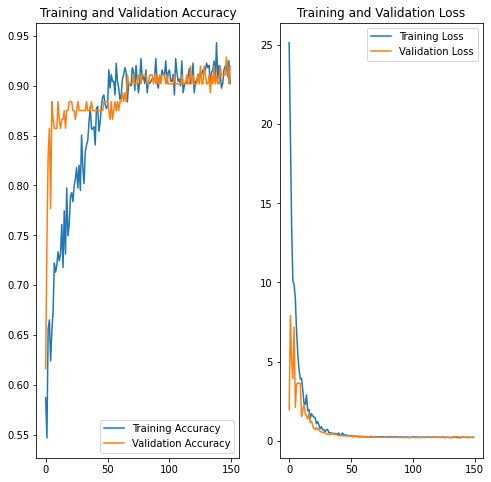

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Predict values and use test set

In [0]:
example = df.iloc[[100]]
print(f"Label: {example['diagnosis']}")
data = (example[my_features]).to_numpy()
data = tf.convert_to_tensor(data)
print(data)
model.predict(data)

Label: 458    0
Name: diagnosis, dtype: int64
tf.Tensor(
[[5.921e-02 9.106e+01 1.762e-02 1.434e+01 8.261e+01 6.285e+02 1.300e+01
  5.202e+02 1.206e-02 4.462e-02 5.073e-02 1.093e-01]], shape=(1, 12), dtype=float64)


array([[0.89647883, 0.10352115]], dtype=float32)

In [0]:
print(len(tf.keras.backend.get_value(test_features)))
for test_feature, test_label in zip(test_features, test_labels):
  true_label = tf.keras.backend.get_value(test_label)
  print(f'Label: {true_label}', end="")

  test_feature = tf.expand_dims(test_feature, 0)
  predicted = model.predict([[test_feature]])[0]
  
  if predicted[0] > predicted[1]:
    if true_label == 0.0:
      print(predicted, "\U0000274E" + "\n")
    else:
      print(predicted, "\U0000274C" + "\n")
  else:
    if true_label == 1.0:
      print(predicted, "\U00002705" + "\n")
    else:
      print(predicted, "\U0000274C" + "\n")

57
Label: 0.0[0.99492115 0.00507888] ❎

Label: 0.0[0.99682    0.00318007] ❎

Label: 1.0[0.332444   0.66755605] ✅

Label: 0.0[0.9966504  0.00334965] ❎

Label: 1.0[0.05683011 0.94316995] ✅

Label: 0.0[0.7934955  0.20650455] ❎

Label: 1.0[0.02287536 0.97712463] ✅

Label: 0.0[0.99840873 0.0015913 ] ❎

Label: 0.0[0.9802924  0.01970766] ❎

Label: 0.0[0.89647883 0.10352115] ❎

Label: 0.0[0.88675743 0.11324259] ❎

Label: 1.0[0.00964839 0.9903516 ] ✅

Label: 1.0[0.05775782 0.9422422 ] ✅

Label: 0.0[0.9707817  0.02921834] ❎

Label: 0.0[0.89647883 0.10352115] ❎

Label: 0.0[0.9975684  0.00243158] ❎

Label: 1.0[2.1780832e-07 9.9999976e-01] ✅

Label: 1.0[2.50495e-10 1.00000e+00] ✅

Label: 1.0[0.02088888 0.97911114] ✅

Label: 1.0[0.79783374 0.20216626] ❌

Label: 0.0[0.89647883 0.10352115] ❎

Label: 0.0[0.89647883 0.10352115] ❎

Label: 0.0[0.95790184 0.04209815] ❎

Label: 0.0[0.8914219  0.10857808] ❎

Label: 0.0[0.95792305 0.0420769 ] ❎

Label: 1.0[0.00553979 0.9944602 ] ✅

Label: 0.0[0.89647883 0.103

In [0]:
model.save('./model.h5')

In [0]:
!ls

In [0]:
reloaded = tf.keras.models.load_model('./model.h5')
reloaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [0]:
example = df.iloc[[100]]
print(f"Label: {example['diagnosis']}")
data = (example[my_features]).to_numpy()
data = tf.convert_to_tensor(data)
print(data)
print(model.predict(data))
print(reloaded.predict(data))

Label: 458    0
Name: diagnosis, dtype: int64
tf.Tensor(
[[5.921e-02 9.106e+01 1.762e-02 1.434e+01 8.261e+01 6.285e+02 1.300e+01
  5.202e+02 1.206e-02 4.462e-02 5.073e-02 1.093e-01]], shape=(1, 12), dtype=float64)
[[0.89647883 0.10352115]]
[[0.89647883 0.10352115]]


In [0]:
reloaded.trainable = False

In [0]:
reloaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

Load model into Tensorflow mode

In [0]:
tf.saved_model.save(model, './modelTF')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./dosErroresTF/assets


In [0]:
!ls

dosErrores.h5  dosErroresTF.h5	Proyecto-CFGS
dosErroresTF   model.zip	sample_data


In [0]:
reloaded_tf = tf.saved_model.load('./modelTF')

In [0]:
reloaded_tf

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7f04fef71cc0>

Al guardarlo con Tensorflow, el objeto devuelto no tiene las funciones de Keras.

In [0]:
reloaded = tf.keras.models.load_model('./modelTF')
reloaded.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                416       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [0]:
!zip -r model.zip ./modelTF
!ls

updating: dosErroresTF/ (stored 0%)
updating: dosErroresTF/assets/ (stored 0%)
updating: dosErroresTF/saved_model.pb (deflated 89%)
updating: dosErroresTF/variables/ (stored 0%)
updating: dosErroresTF/variables/variables.index (deflated 65%)
updating: dosErroresTF/variables/variables.data-00000-of-00001 (deflated 21%)
dosErrores.h5  dosErroresTF.h5	Proyecto-CFGS
dosErroresTF   model.zip	sample_data


In [0]:
try:
  from google.colab import files
  files.download('./model.zip')
except ImportError:
  pass